In [1]:
import torch
from torch import nn
from d2l import torch as d2l

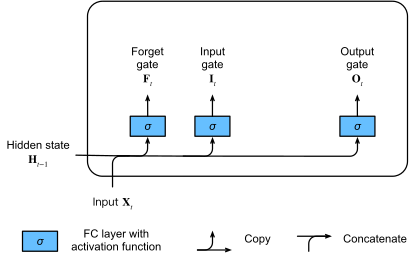

In [2]:
from IPython import display

display.SVG('imgs/lstm-gates.svg')

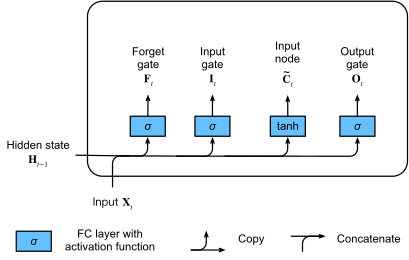

In [3]:
display.SVG('imgs/lstm-input.svg')

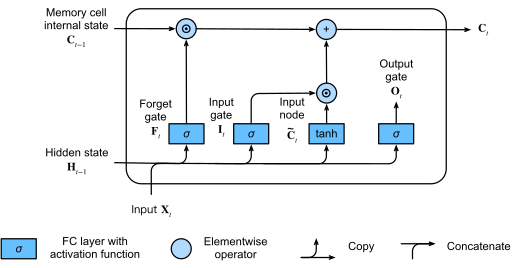

In [4]:
display.SVG('imgs/lstm-internal-state.svg')

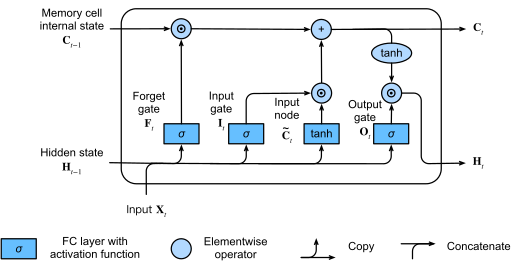

In [5]:
display.SVG('imgs/lstm-hidden.svg')

In [6]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [23]:
def init_params(vocab_size, num_hiddens, device):
    num_inputs = vocab_size
    num_outputs = vocab_size
    
    ### Gaussian distribution for initialization
    def gate_params():
        return (
            torch.randn(size=(num_inputs, num_hiddens), device=device) * 0.01,
            torch.randn(size=(num_hiddens, num_hiddens), device=device) * 0.01,
            torch.zeros(num_hiddens, device=device)
        )
        
    # 1. Input gate params
    W_xi, W_hi, b_i = gate_params() 
    
    # 2. Forget gate params
    W_xf, W_hf, b_f = gate_params() 
    
    # 3. Output gate params
    W_xo, W_ho, b_o = gate_params()
    
    # 4. Input node params
    W_xc, W_hc, b_c = gate_params()
    
    # 5. Output layer params
    W_hq = torch.randn(size=(num_hiddens, num_outputs), device=device) * 0.01
    b_q = torch.zeros(num_outputs, device=device)
    
    ### Initialize gradient of all parameters
    params = [W_xi, W_hi, b_i, 
              W_xf, W_hf, b_f,
              W_xo, W_ho, b_o, 
              W_xc, W_hc, b_c,
              W_hq, b_q]
    for p in params:
        p.requires_grad_(True)
    return params

In [24]:
def init_lstm_state(batch_size, num_hiddens, device):
    return (torch.zeros((batch_size, num_hiddens), device=device),
            torch.zeros((batch_size, num_hiddens), device=device))

In [25]:
def lstm(inputs, state, params):
    [W_xi, W_hi, b_i, 
     W_xf, W_hf, b_f,
     W_xo, W_ho, b_o, 
     W_xc, W_hc, b_c,
     w_hq, b_q] = params
    
    (H, C) = state
    outputs = []
    
    for X in inputs:
        I = torch.sigmoid((X @ W_xi) + (H @ W_hi) + b_i)
        F = torch.sigmoid((X @ W_xf) + (H @ W_hf) + b_f)
        O = torch.sigmoid((X @ W_xo) + (H @ W_ho) + b_o)
        C_t = torch.tanh((X @ W_xc) + (H @ W_hc) + b_c)
        C = F * C + I * C_t
        H = O * torch.tanh(C)
        Y = (H @ w_hq) + b_q
        outputs.append(Y)
    
    return torch.cat(outputs, dim=0), (H, C)

In [26]:
batch_size = 32
num_steps = 35
train_iter, vocab = d2l.load_data_time_machine(batch_size, num_steps)

In [30]:
vocab_size = len(vocab)
num_hiddens = 256
model = d2l.RNNModelScratch(len(vocab), num_hiddens, device, 
                            init_params, init_lstm_state, lstm)

perplexity 1.1, 23975.6 tokens/sec on cuda
time traveller for so it will be convenient to speak of himwas e
travelleryou can show black is white by argument said filby


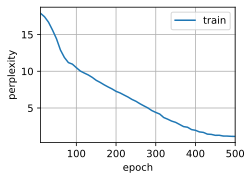

In [31]:
EPOCHE = 500
LR = 1
d2l.train_ch8(model, train_iter, vocab, LR, EPOCHE, device)

perplexity 1.0, 103306.6 tokens/sec on cuda
time travelleryou can show black is white by argument said filby
travelleryou can show black is white by argument said filby


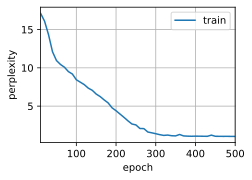

In [32]:
num_inputs = vocab_size
lstm_layer = nn.LSTM(num_inputs, num_hiddens)
model = d2l.RNNModel(lstm_layer, len(vocab))
model = model.to(device)
d2l.train_ch8(model, train_iter, vocab, LR, EPOCHE, device)